# Initial Data Exploration of Geojson Files for "Neighborhood Food Retail" and "Philadelphia Food Access"
I chose to explore these datasets as geojson files because I believe their physical location within Philadelphia is very revealing and shows the stark inequality that we are facing as a city.

### Neighborhood availability of "high-produce supply stores” (e.g., supermarkets, produce stores, farmers’ markets) in relation to “low-produce supply stores” and Walkable Access to Healthy Foods in Philadelphia

### Data
   * Two GEOJson files
     * https://www.opendataphilly.org/dataset/neighborhood-food-retail
     * https://www.opendataphilly.org/dataset/philadelphia-food-access
     
## In this Notebook I combine my data to create an Accessibility score
My hope for this score is that it can be a reference point for comparison and city planning. In the future I hope that people take this into account when initiating programs, stores, schools, homes, or restaurants within a community.
   

I am looking to explore how financial access to healthy food and walking distance to healthy food are related and impact each other.

#### This data explores Accessibility to healthy foods by neighborhood

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
nb_gdf = gpd.read_file('../data/NeighborhoodFoodRetail.geojson')

In [3]:
nb_gdf.shape

(1336, 17)

there are 1336 rows and 17 columns

In [4]:
nb_gdf.columns

Index(['OBJECTID', 'GEOID10', 'NON_RESIDENTIAL', 'TOTAL_LPSS', 'LPSS_PER1000',
       'TOTAL_HPSS', 'HPSS_PER1000', 'PCT_HPSS', 'HPSS_ACCESS',
       'SUPERMARKET_ACCESS', 'PCT_VEHICLE_AVAILABILITY', 'TOTAL_RESTAURANTS',
       'PCT_POVERTY', 'HIGH_POVERTY', 'Shape__Area', 'Shape__Length',
       'geometry'],
      dtype='object')

In [5]:
nb_gdf['geometry']

0       POLYGON ((-75.19851 39.96945, -75.20372 39.970...
1       POLYGON ((-75.19783 39.96571, -75.19794 39.966...
2       POLYGON ((-75.18766 39.96450, -75.18774 39.964...
3       POLYGON ((-75.20984 39.97351, -75.20998 39.974...
4       POLYGON ((-75.19855 39.97330, -75.19857 39.973...
                              ...                        
1331    POLYGON ((-75.15868 40.06656, -75.15829 40.066...
1332    POLYGON ((-75.15524 40.07045, -75.15485 40.070...
1333    POLYGON ((-75.16098 40.06066, -75.16080 40.060...
1334    POLYGON ((-75.16069 40.06448, -75.16064 40.064...
1335    POLYGON ((-75.15933 40.06370, -75.15922 40.063...
Name: geometry, Length: 1336, dtype: geometry

In [6]:
nb_gdf.head()

,OBJECTID,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,PCT_VEHICLE_AVAILABILITY,TOTAL_RESTAURANTS,PCT_POVERTY,HIGH_POVERTY,Shape__Area,Shape__Length,geometry
0,1,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044,"POLYGON ((-75.19851 39.96945, -75.20372 39.970..."
1,2,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.882812,1736.152373,"POLYGON ((-75.19783 39.96571, -75.19794 39.966..."
2,3,421010109002,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,74520.027344,1211.853466,"POLYGON ((-75.18766 39.96450, -75.18774 39.964..."
3,4,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,185771.992188,2057.362419,"POLYGON ((-75.20984 39.97351, -75.20998 39.974..."
4,5,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,242486.906250,4166.159591,"POLYGON ((-75.19855 39.97330, -75.19857 39.973..."


In [7]:
nb_gdf['HPSS_ACCESS'].value_counts()

Moderate or High Access    1139
Low Access                  107
No Access                    79
Name: HPSS_ACCESS, dtype: int64

My data says that 1130 areas have Moderate or High Access, 107 areas have Low Access, and 79 have No Access. While the numbers are in descending order, for the highest percentage with access, 79 areas is still large considering these are mothers, fathers, sisters, brothers, children who are apart of our community and need to have fairer access to healthy food. 

<AxesSubplot:>

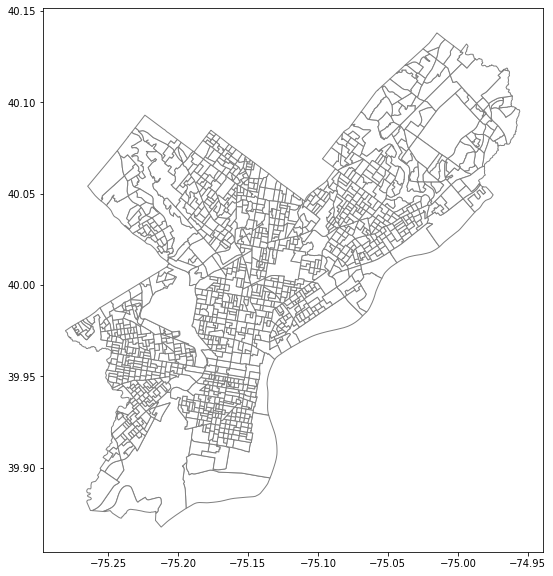

In [8]:
# base plot
nb_gdf.plot(figsize=(10,10), color='white', edgecolor='gray')

<AxesSubplot:>

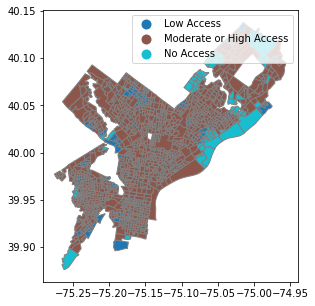

In [9]:
nb_gdf.plot(figsize=(5,5), edgecolor='gray', column='HPSS_ACCESS', categorical=True, legend=True)

This image above shows a map of Philadelphia broken down into three categories and organized as such: Low Access = Dark Blue, Moderate or High Access = Brown, and No Access = Teal. What stands out to me about this map is not the majority Brown, but the concentrated geo-locations that are Dark Blue or Teal. The most significantly under served area seems to be North East Philadelphia which is showing primarily Dark Blue and Teal (Low or No Access).

<AxesSubplot:>

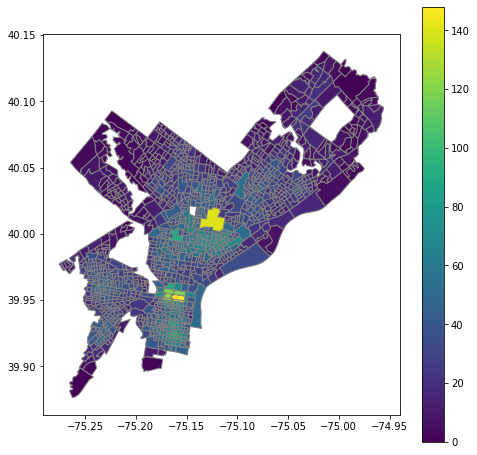

In [10]:
nb_gdf.plot(figsize=(8,8), edgecolor='gray', column='TOTAL_LPSS', legend=True)

The map above is a heat map depicting Accessibility to healthy food by neighborhood shown through a heat map scale. With yellow (140+) as neighborhoods with the most access and purple (20 or less) with areas with the lowest access. There is a clear pattern in this graphic showing that darker blues and purples are on the outskirts and edges of the city, while the lighter greens and yellows are centrally located. The most prominent is the biggest yellow neighborhood seems to be located around Rittenhouse and Center City which makes sense because those are two primarily affluent areas with restaurants and markets on almost every corner.

#### This data explores walking access to healthy foods in Philadelphia

In [11]:
walk_gdf = gpd.read_file('../data/Walkable_Access_Healthy_Food.geojson.json')

In [12]:
walk_gdf.shape

(18872, 6)

there are 18872 rows and 6 columns

In [13]:
walk_gdf.columns

Index(['OBJECTID', 'GEOID', 'ACCESS_', 'Shape__Area', 'Shape__Length',
       'geometry'],
      dtype='object')

In [14]:
walk_gdf['geometry']

0        POLYGON ((-75.11283 39.96856, -75.11568 39.972...
1        POLYGON ((-75.19597 39.98448, -75.19586 39.984...
2        POLYGON ((-75.19411 39.97381, -75.19469 39.973...
3        POLYGON ((-75.19487 39.94732, -75.19761 39.946...
4        POLYGON ((-75.18746 40.00497, -75.18782 40.006...
                               ...                        
18867    POLYGON ((-75.07725 39.99645, -75.07648 39.996...
18868    POLYGON ((-75.06548 39.99495, -75.06448 39.993...
18869    POLYGON ((-75.09016 40.00416, -75.09006 40.004...
18870    POLYGON ((-75.09541 40.00103, -75.09635 40.001...
18871    POLYGON ((-75.09690 39.98378, -75.09714 39.983...
Name: geometry, Length: 18872, dtype: geometry

In [15]:
walk_gdf.head()

,OBJECTID,GEOID,ACCESS_,Shape__Area,Shape__Length,geometry
0,1,421010378001037,No Access,2.117942e+06,8830.039023,"POLYGON ((-75.11283 39.96856, -75.11568 39.972..."
1,2,421019800001053,No Access,5.803100e+06,9418.832796,"POLYGON ((-75.19597 39.98448, -75.19586 39.984..."
2,3,421019800001164,No Access,5.994356e+05,9793.030362,"POLYGON ((-75.19411 39.97381, -75.19469 39.973..."
3,4,421010369002011,No Access,1.186508e+06,6529.555121,"POLYGON ((-75.19487 39.94732, -75.19761 39.946..."
4,5,421010170001005,No Access,2.291195e+06,7011.517275,"POLYGON ((-75.18746 40.00497, -75.18782 40.006..."


<AxesSubplot:>

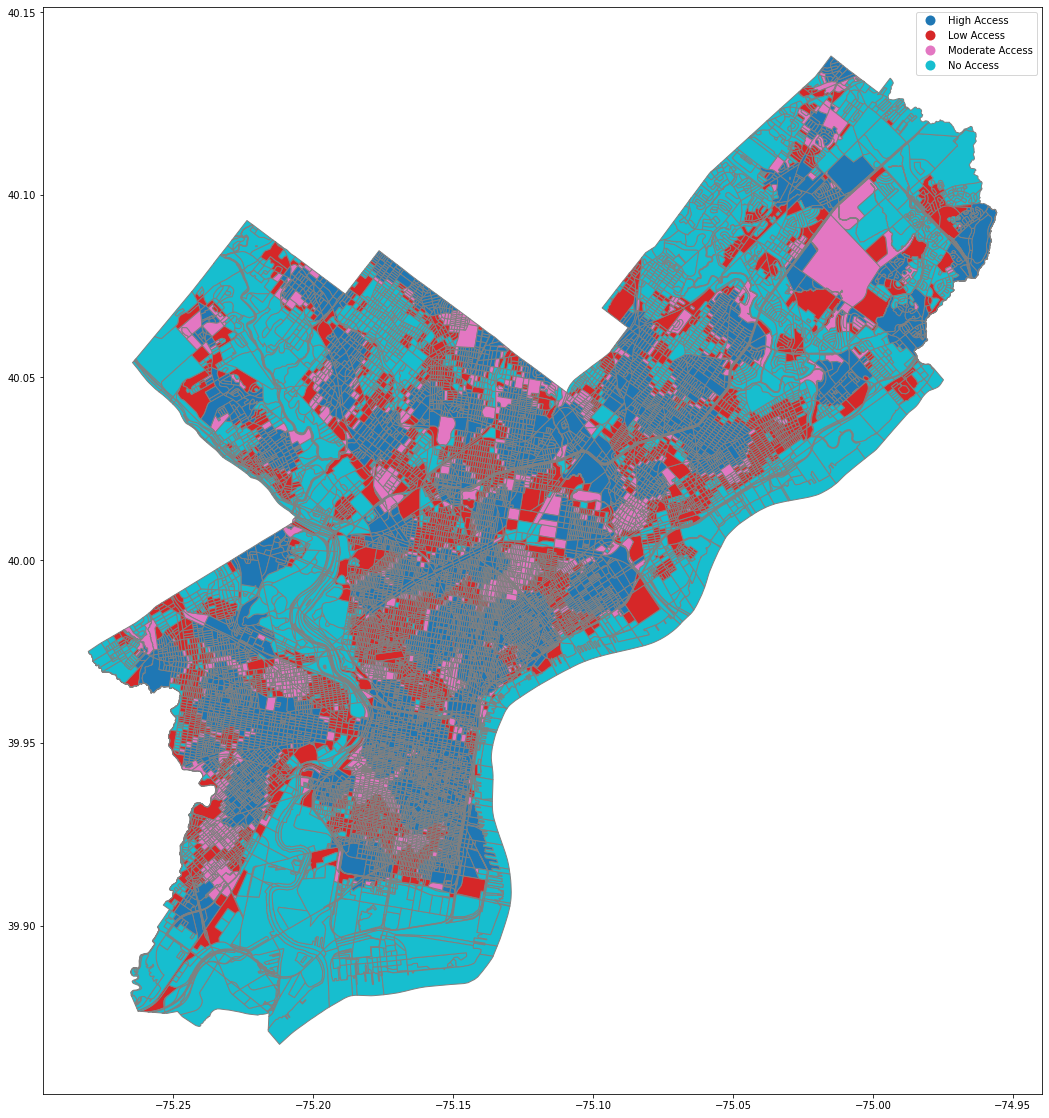

In [16]:
walk_gdf.plot(figsize=(20,20), edgecolor='gray', column='ACCESS_', categorical=True, legend=True)

The image above is a map, by geolocation, showing walkability Access on four levels. Dark Blue = High Walkable Access, Pink = Moderate Walkable Access, Red = Low Walkable Access, and Teal = No Walkable Access. While high through low accessibility by walking is dispersed through the city, there is a clear distinction that most neighborhoods with No Access (Teal)are on the boarders of the city, which is consistent with my findings about Accessibility in general.

#### Accessibility Score
 * Joining two data sets and creating a composite accessibility metric then mapping those metrics
 * I will combine the data from NeighborhoodFoodRetail and Walkable_Access_Healthy_Food to form an accessibility score ranking locations from lowest to highest with multiple factors counting towards that score.

In [17]:
nb_gdf["geometry"].take([0,1,2])[:1000]

0    POLYGON ((-75.19851 39.96945, -75.20372 39.970...
1    POLYGON ((-75.19783 39.96571, -75.19794 39.966...
2    POLYGON ((-75.18766 39.96450, -75.18774 39.964...
Name: geometry, dtype: geometry

In [18]:
walk_gdf["geometry"].take([0,1,2])[:1000]
#These are respectively 'HPSS_ACCESS' 'SUPERMARKET_ACCESS' "_ACCESS"

0    POLYGON ((-75.11283 39.96856, -75.11568 39.972...
1    POLYGON ((-75.19597 39.98448, -75.19586 39.984...
2    POLYGON ((-75.19411 39.97381, -75.19469 39.973...
Name: geometry, dtype: geometry

In [19]:
pd.merge(nb_gdf, walk_gdf, left_on="GEOID10", right_on="GEOID")

,OBJECTID_x,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,...,HIGH_POVERTY,Shape__Area_x,Shape__Length_x,geometry_x,OBJECTID_y,GEOID,ACCESS_,Shape__Area_y,Shape__Length_y,geometry_y


In [20]:
merged_gdf = gpd.sjoin(walk_gdf, nb_gdf,  op="within")

In [21]:
merged_gdf.columns

Index(['OBJECTID_left', 'GEOID', 'ACCESS_', 'Shape__Area_left',
       'Shape__Length_left', 'geometry', 'index_right', 'OBJECTID_right',
       'GEOID10', 'NON_RESIDENTIAL', 'TOTAL_LPSS', 'LPSS_PER1000',
       'TOTAL_HPSS', 'HPSS_PER1000', 'PCT_HPSS', 'HPSS_ACCESS',
       'SUPERMARKET_ACCESS', 'PCT_VEHICLE_AVAILABILITY', 'TOTAL_RESTAURANTS',
       'PCT_POVERTY', 'HIGH_POVERTY', 'Shape__Area_right',
       'Shape__Length_right'],
      dtype='object')

In [22]:
merged_gdf[['HPSS_ACCESS', 'ACCESS_']].value_counts()

HPSS_ACCESS              ACCESS_        
Moderate or High Access  High Access        3999
                         Low Access         1828
                         No Access          1061
                         Moderate Access     935
No Access                No Access           437
Low Access               Low Access          250
No Access                Low Access          210
Low Access               No Access           204
                         Moderate Access      32
                         High Access          29
No Access                High Access          19
                         Moderate Access       7
dtype: int64

<AxesSubplot:xlabel='HPSS_ACCESS,ACCESS_'>

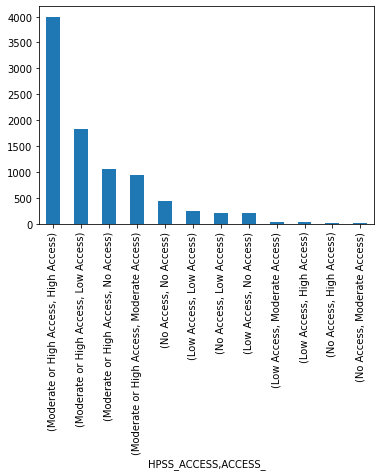

In [23]:
merged_gdf[['HPSS_ACCESS', 'ACCESS_']].value_counts().plot.bar()

In [24]:
merged_gdf['ACCESS_'].unique()

array(['No Access', 'High Access', 'Low Access', 'Moderate Access'],
      dtype=object)

Below I assigned values to the significant columns from the two data sets. The distribution of points is not equal among categories to avoid inconsistencies and "ties" within the rankings. For the Accessibility to High Quality Produce score I assigned 0 points to "No Access", 4 points to "Low Access", and 6 points to "Moderate or High Access". For the Walkable Accessibility score I assigned 0 points to "No Access:, 1 point to "Low Access", 3 points to "Moderate Access", and 5 points to "High Access". I awarded fewer points to the Walkable Access score because I am accounting for a portion of those without walkable access to have access to public transport or a vehicle.

In [25]:
map_hpss_to_score = {
    'Moderate or High Access': 6, 
    'Low Access': 4,
    'No Access': 0, 
}

map_walk_access_to_score = {
    'No Access': 0, 
    'Low Access': 1, 
    'Moderate Access': 3,
    'High Access': 5, 
}

In [26]:
# mapped ACCESS_ to score
# mapped HPSS to score
# added together

merged_gdf['combined_score']=merged_gdf['ACCESS_'].map(map_walk_access_to_score) + merged_gdf['HPSS_ACCESS'].map(map_hpss_to_score)

In [27]:
merged_gdf['combined_score'].value_counts()

11.0    3999
7.0     1860
6.0     1061
9.0      964
0.0      437
5.0      269
1.0      210
4.0      204
3.0        7
Name: combined_score, dtype: int64

In [28]:
merged_gdf['combined_score'].plot

With the highest score being a 19, the 3999 with a score of 11.0 is still promising, but what concerns me is the 437 constituents of Philadelphia with a score of 0.0 and the 210 more with a score of 1.0

My hope is that these scores could one day be published and used to pitch innovations in the food industry that create accessibility across socioeconomic and geodemographic groups providing access to healthy food for all.

<AxesSubplot:>

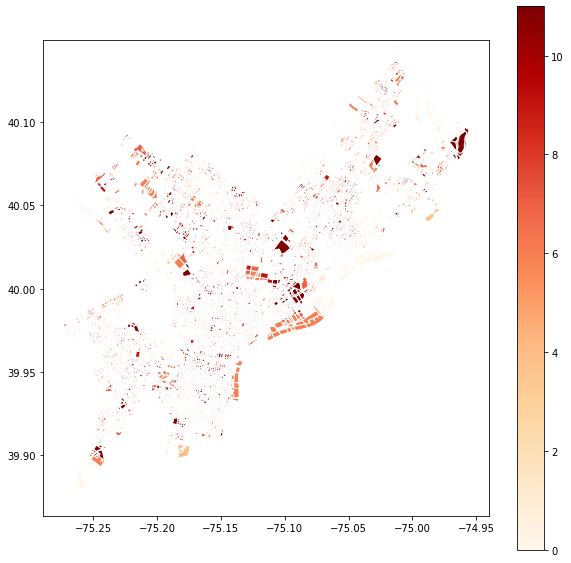

In [29]:
merged_gdf.dropna().plot(figsize=(10,10), edgecolor='white', column='combined_score', 
                categorical=False, legend=True, cmap='OrRd')

In [30]:
merged2_gdf=gpd.sjoin(nb_gdf,walk_gdf, op="contains")

In [31]:
merged2_gdf['combined_score']=merged2_gdf['ACCESS_'].map(map_walk_access_to_score) + merged2_gdf['HPSS_ACCESS'].map(map_hpss_to_score)

In [32]:
merged2_gdf=merged2_gdf.dissolve('GEOID10',aggfunc='mean')

In [33]:
# Saved the merged geopandas data frame to data/processed_data

merged2_gdf.to_file("../data/processed_data/accessible_score_by_neighborhood.geojson", driver='GeoJSON')

In [34]:
merged2_gdf.shape

(1276, 17)

<AxesSubplot:>

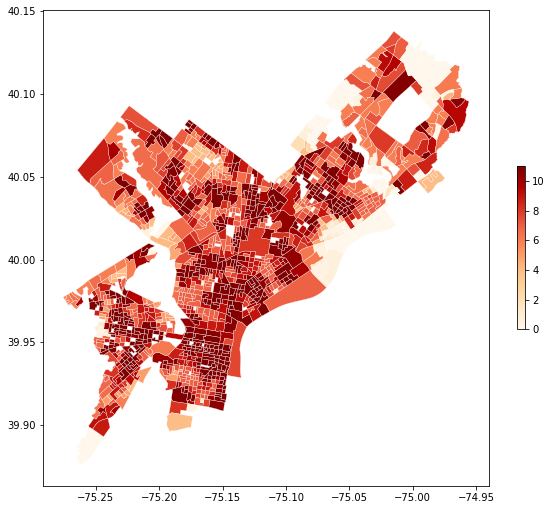

In [35]:
merged2_gdf.dropna().plot(figsize=(10,10), edgecolor='white', linewidth=0.3, column='combined_score', 
                categorical=False, legend=True, cmap='OrRd', legend_kwds={'shrink': 0.3})

* This map above shows a visual representation and rating of the Philadelphia neighborhoods by sorting them by their accessibility scores. Scores of 10 and above are depicted with a dark Maroon, and scores of 2 or below are depicted with Beige. There is a region or cluster of neighborhoods in North East Philadelphia that has extremely low scores, and the color is almost White showing how deprived of access this neighborhood is. This is consistent with my findings above, stating that the boarders of Philadelphia are those lacking most in access.

### This Data leads me to understand just how much fundamental change needs to be made within the Food and Produce accessibilty in Philadelphia

## Extra dimensions to consider

### Philadelphia Planning Districts

> ### Planning Districts
>
> To illustrate the outlines of the 18 Districts for Philadelphia2035 District Plans.
>
> * https://www.opendataphilly.org/dataset/planning-districts
> these districts make the data easier to visualize and publicize

In [36]:
planning_districts_gdf = gpd.read_file('../data/Planning_Districts.geojson')
planning_districts_gdf['centroid'] = planning_districts_gdf['geometry'].centroid

In [37]:
def draw_region_label(r, basemap, score=False):
    region = r['DIST_NAME'].replace(' ','\n')
    
    if score:
        cscore = r['combined_score']
        region += f'\n({cscore:.1f})'
    
    x = r['centroid'].x
    y = r['centroid'].y
    bmap.text(x,y,region, ha='center', 
              va='center', fontsize=8)

    


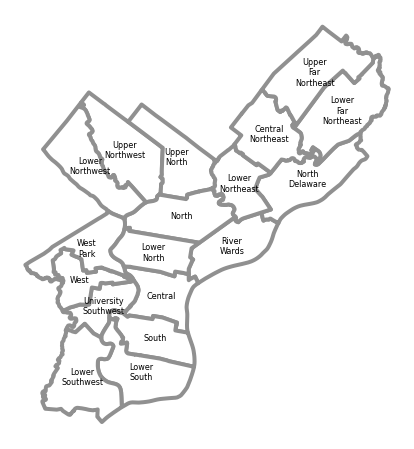

In [38]:
bmap=planning_districts_gdf.plot(color='white', edgecolor="#909090", 
                                 linewidth=4,
                                 figsize=(8,8))

planning_districts_gdf.apply(lambda r: draw_region_label(r, bmap), axis=1)
bmap.axis('off');

This above map shows a less specific categorization of Philadelphia split into 18 government recognized districts that starting in 2035 will be used for city planning and regulations.

In [39]:
planning_districts_gdf

,OBJECTID_1,OBJECTID,DIST_NAME,ABBREV,Shape__Area,Shape__Length,PlanningDist,DaytimePop,geometry,centroid
0,1,14,River Wards,RW,2.107270e+08,66931.595020,None,None,"POLYGON ((-75.09798 40.00496, -75.09687 40.005...",POINT (-75.09599 39.98787)
1,2,3,North Delaware,NDEL,2.700915e+08,89213.074378,None,None,"POLYGON ((-74.98159 40.05363, -74.98139 40.053...",POINT (-75.02828 40.03352)
2,3,0,Lower Far Northeast,LFNE,3.068529e+08,92703.285159,None,None,"POLYGON ((-74.96443 40.11728, -74.96434 40.117...",POINT (-74.99717 40.08028)
3,4,9,Central,CTR,1.782880e+08,71405.143450,None,None,"POLYGON ((-75.14791 39.96733, -75.14715 39.967...",POINT (-75.15878 39.95379)
4,5,10,University Southwest,USW,1.296468e+08,65267.676141,None,None,"POLYGON ((-75.18742 39.96338, -75.18644 39.963...",POINT (-75.21075 39.94672)
5,6,17,Upper Northwest,UNW,2.851603e+08,82109.452088,None,None,"POLYGON ((-75.20629 40.08296, -75.20415 40.081...",POINT (-75.19133 40.05339)
6,7,18,Upper North,UNO,2.227549e+08,74155.453511,None,None,"POLYGON ((-75.15584 40.07274, -75.15470 40.072...",POINT (-75.14528 40.04860)
7,8,8,South,STH,1.748206e+08,65197.355636,None,None,"POLYGON ((-75.19461 39.94217, -75.19443 39.942...",POINT (-75.16484 39.92465)
8,9,15,North,NOR,2.394755e+08,75031.769136,None,None,"POLYGON ((-75.10969 40.02217, -75.10937 40.022...",POINT (-75.14070 40.00801)
9,10,16,Lower Northwest,LNW,2.585253e+08,88665.925954,None,None,"POLYGON ((-75.21379 40.04911, -75.21378 40.049...",POINT (-75.22275 40.04253)


### Combined plot of accessibility score and planning districts

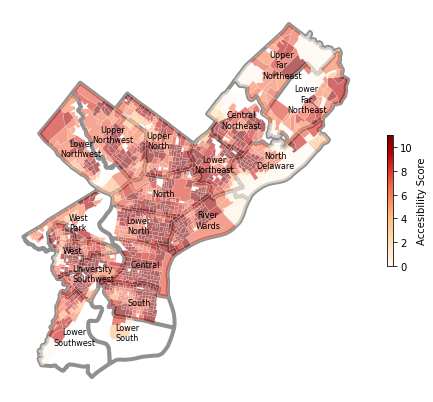

In [40]:
    
bmap=planning_districts_gdf.plot(color='white', edgecolor="#909090", 
                                 linewidth=4,
                                 figsize=(8,8))

merged2_gdf.plot(ax=bmap, edgecolor='white', linewidth=0.3, column='combined_score', 
                 categorical=False, legend=True, 
                 cmap='OrRd', legend_kwds={'shrink': 0.3, 
                                           'label': 'Accesibility Score'},
                 alpha=0.6
                )    


planning_districts_gdf.apply(lambda r: draw_region_label(r, bmap), axis=1)
bmap.axis('off');

By overlaying accessibility scores with Philadelphia government recognized districts I can easily make generalizations and groupings to help readers understand which districts are at risk and need more attention both from government entities and Philadelphia natives who have the means to give back.

In [41]:
planning_districts_gdf

,OBJECTID_1,OBJECTID,DIST_NAME,ABBREV,Shape__Area,Shape__Length,PlanningDist,DaytimePop,geometry,centroid
0,1,14,River Wards,RW,2.107270e+08,66931.595020,None,None,"POLYGON ((-75.09798 40.00496, -75.09687 40.005...",POINT (-75.09599 39.98787)
1,2,3,North Delaware,NDEL,2.700915e+08,89213.074378,None,None,"POLYGON ((-74.98159 40.05363, -74.98139 40.053...",POINT (-75.02828 40.03352)
2,3,0,Lower Far Northeast,LFNE,3.068529e+08,92703.285159,None,None,"POLYGON ((-74.96443 40.11728, -74.96434 40.117...",POINT (-74.99717 40.08028)
3,4,9,Central,CTR,1.782880e+08,71405.143450,None,None,"POLYGON ((-75.14791 39.96733, -75.14715 39.967...",POINT (-75.15878 39.95379)
4,5,10,University Southwest,USW,1.296468e+08,65267.676141,None,None,"POLYGON ((-75.18742 39.96338, -75.18644 39.963...",POINT (-75.21075 39.94672)
5,6,17,Upper Northwest,UNW,2.851603e+08,82109.452088,None,None,"POLYGON ((-75.20629 40.08296, -75.20415 40.081...",POINT (-75.19133 40.05339)
6,7,18,Upper North,UNO,2.227549e+08,74155.453511,None,None,"POLYGON ((-75.15584 40.07274, -75.15470 40.072...",POINT (-75.14528 40.04860)
7,8,8,South,STH,1.748206e+08,65197.355636,None,None,"POLYGON ((-75.19461 39.94217, -75.19443 39.942...",POINT (-75.16484 39.92465)
8,9,15,North,NOR,2.394755e+08,75031.769136,None,None,"POLYGON ((-75.10969 40.02217, -75.10937 40.022...",POINT (-75.14070 40.00801)
9,10,16,Lower Northwest,LNW,2.585253e+08,88665.925954,None,None,"POLYGON ((-75.21379 40.04911, -75.21378 40.049...",POINT (-75.22275 40.04253)


In [42]:
planning_districts_gdf.columns

Index(['OBJECTID_1', 'OBJECTID', 'DIST_NAME', 'ABBREV', 'Shape__Area',
       'Shape__Length', 'PlanningDist', 'DaytimePop', 'geometry', 'centroid'],
      dtype='object')

In [43]:
cols_to_keep = ['geometry', 'TOTAL_LPSS', 'LPSS_PER1000', 'TOTAL_HPSS',
       'HPSS_PER1000', 'PCT_HPSS', 'PCT_VEHICLE_AVAILABILITY',
       'TOTAL_RESTAURANTS', 'PCT_POVERTY',  'combined_score']

acc_score_gdf = merged2_gdf[cols_to_keep]

In [44]:
districts_gdf=gpd.sjoin(planning_districts_gdf,acc_score_gdf, how='right', op="contains")

In [45]:
districts_gdf=districts_gdf.dissolve('DIST_NAME',aggfunc='mean')

The map below shows average accessibility scores of each of the 18 Districts

<AxesSubplot:>

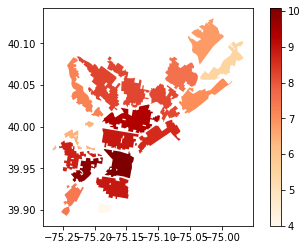

In [46]:
districts_gdf.plot(column='combined_score', legend=True, cmap='OrRd')

The table below shows the averages of each district from lowest (Lower South) to highest combined accessibility score (Central)

In [47]:
districts_gdf.sort_values('combined_score')['combined_score'].to_frame()

,combined_score
DIST_NAME,
Lower South,4.000000
Lower Far Northeast,5.493325
West Park,6.442997
Upper Far Northeast,6.812716
North Delaware,7.014372
Lower Northwest,7.238150
Lower Southwest,7.428351
Central Northeast,7.560052
Lower Northeast,8.202543


In [48]:
accscore_districts_gdf=pd.merge(planning_districts_gdf, 
         districts_gdf['combined_score'],
         left_on='DIST_NAME',
         right_index=True)

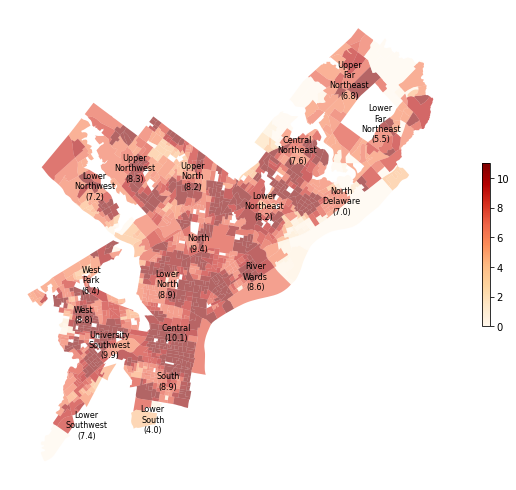

In [49]:
bmap=acc_score_gdf.plot(column='combined_score', 
                             cmap='OrRd', figsize=(10,10),
                             alpha=0.6,
                             legend=True, 
                             legend_kwds={'shrink': 0.3})
accscore_districts_gdf.apply(lambda r: draw_region_label(r, bmap, score=True), axis=1)
bmap.axis('off');

# Combined Score Analysis

* This scoring is much more visually pleasing to look at and offers clearer visuals for a brochure or website although it loses much of the detail that comes with looking at each neighborhood or block on its own. This map and these clearly deviated averages are marketable. There is a balance that we need to consider, as it is important to understand by creating a map of averages how we loose much of the detail and subtle patterns can become easily lost. In Philadelphia, blocks or groups of blocks can be close together but have very different profiles in terms of wealth, resources, and accessibility. So even though North gets a high average score there are pockets with very low scores when you analyze the more specific charting.

### Exploring the `PCT_POVERTY` variable

* I account for Percentage Poverty in my main data sets, but I believe it is important to analyze this data on its own.
* Below shows Percentage Poverty in Philadelphia next to my Accessibility Score.

<AxesSubplot:>

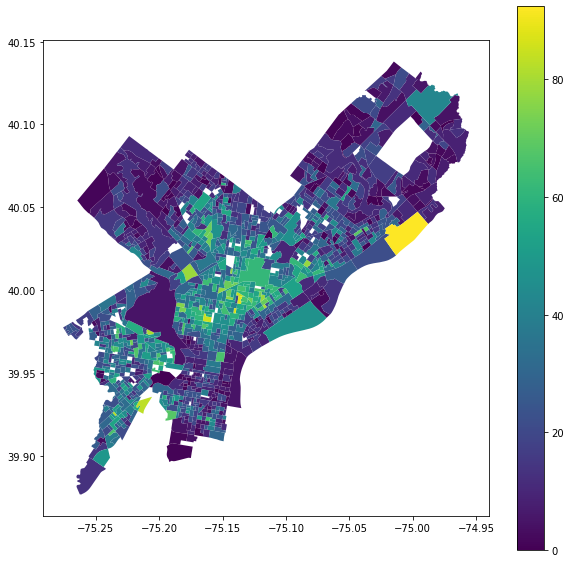

In [50]:
merged2_gdf.plot(column='PCT_POVERTY', legend=True, figsize=(10,10))

* The above map shows percent poverty by neighborhood (more specific than district) with dark purple being the lowest percentage of poverty and yellow being the highest poverty percentage.

(-75.29165459508754, -74.93975303675516, 39.863419906609096, 40.15100698069989)

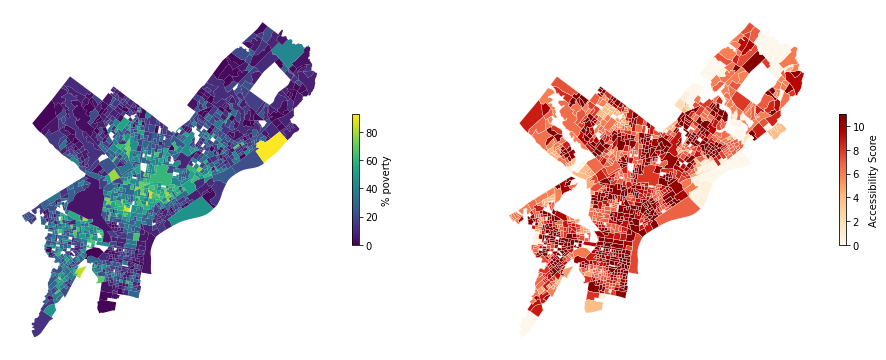

In [51]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

merged2_gdf.plot(ax=ax[0], column='PCT_POVERTY', legend=True,
                legend_kwds={'shrink': 0.3, 'label': '% poverty'})

merged2_gdf.dropna().plot(ax=ax[1], figsize=(10,10), edgecolor='white', linewidth=0.3, column='combined_score', 
                categorical=False, legend=True, cmap='OrRd', 
                          legend_kwds={'shrink': 0.3, 'label':'Accessibility Score'})

ax[0].axis('off')
ax[1].axis('off')

* These two maps in comparison show results consistent to my findings in other maps and my hypothesis that I am making regarding my data. Most notable is the yellow region that is marked by an over 80% poverty level, which correlates to a very low 0-2 Accessibility score noted by the cream color in that region. This falls into the "North Delaware" district of Philadelphia.

<AxesSubplot:>

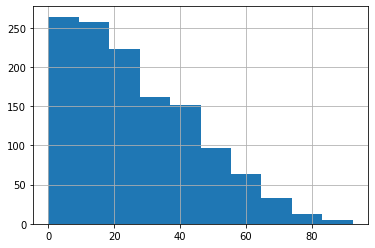

In [52]:
# Distribution of the variable
merged2_gdf['PCT_POVERTY'].hist()

In [53]:
# what is the middle value (median)?
merged2_gdf['PCT_POVERTY'].median()

22.89156627

* I am charting poverty into three distinct groups
        1. less than 20% (low poverty)
        2. 20-50%
        3. greater 50%
It is important to note that there is a large range between these groups, but for visual marketing purposes it is important to make distinctions.

In [54]:
# I created a new categorical column called poverty_cat

pov_tests = (merged2_gdf['PCT_POVERTY'].isnull(),
             merged2_gdf['PCT_POVERTY']>50,
             (merged2_gdf['PCT_POVERTY']>20) & (merged2_gdf['PCT_POVERTY']<50),
             merged2_gdf['PCT_POVERTY']<=20,
            )

pov_cats = [None, '>50%', '20%-50%','<20%']

merged2_gdf['poverty_cat'] = np.select(pov_tests, pov_cats)

<AxesSubplot:>

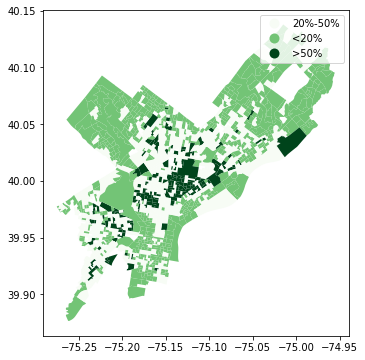

In [55]:
merged2_gdf.plot(column='poverty_cat', categorical=True, 
                 figsize=(6,6),
                 legend=True, cmap='Greens')

The map above distributed poverty into three categories and shows similarly consistent scores with the rest of my analyses. The North Delaware region is noted as dark green indicating a larger than 50% poverty level. What is surprising is that the highest average accessibility scores are in areas with >50% poverty. A revealing aspect of this map is that many areas in Central Philadelphia are marked as having more than 50% poverty levels, even though those areas show higher accessibility. This is representative of my claim that Philadelphia districts are extremely diverse in terms of access within district lines. The danger of averaging means is that a district may have the wealthiest and severely struggling constituents living closely together, and only report an average of those two with an accessibility score that does not raise worry, resulting in less public programs being implemented in those areas.

In [56]:
merged2_gdf.groupby('poverty_cat')['combined_score'].mean()

poverty_cat
20%-50%    8.372861
<20%       8.046438
>50%       8.648898
Name: combined_score, dtype: float64

* These numbers are surprising in that the highest average accessibility scores are in areas with >50% poverty
* this reveals a weakness within my research and data because many marginalized groups can fall through the cracks when creating averages.

In [57]:
merged2_gdf.dropna().groupby('poverty_cat')[['combined_score', 'PCT_POVERTY']].corr()

combined_score  PCT_POVERTY
poverty_cat                                            
20%-50%     combined_score        1.000000     0.068780
            PCT_POVERTY           0.068780     1.000000
<20%        combined_score        1.000000     0.066270
            PCT_POVERTY           0.066270     1.000000
>50%        combined_score        1.000000     0.002515
            PCT_POVERTY           0.002515     1.000000

* The table above showing combined percent poverty scores is not useful to my data analysis

poverty_cat
20%-50%    AxesSubplot(0.125,0.125;0.775x0.755)
<20%       AxesSubplot(0.125,0.125;0.775x0.755)
>50%       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

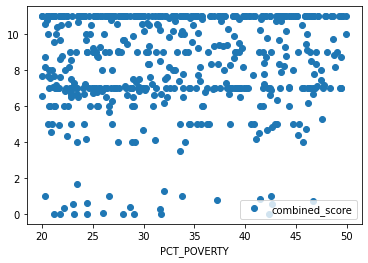

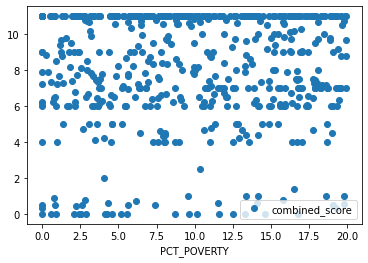

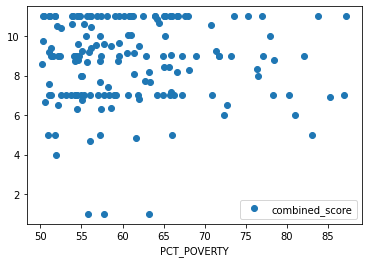

In [58]:
merged2_gdf.dropna().groupby('poverty_cat')[['combined_score', 'PCT_POVERTY']].plot(x='PCT_POVERTY', y='combined_score', style='o')

Above shows the percent poverty organized by three scatter plot charts. These are not useful to my research as they are hard to read and do not give us any new useful information.